# 1) Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.common import SettingWithCopyWarning
import warnings

In [ ]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# 2) Import Dataset

In [ ]:
data = pd.read_excel('breast-cancer-wisconsin.xls')
data.head(10)

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# 3) Perform Data Preprocessing

## i) Handle Missing Values

All null values have been denoted by ? in the dataset. Hence we replace ? by null

In [ ]:
for col in data:
    data[col].replace('?', np.nan, inplace=True)

In [ ]:
for col in data:
    print(data[col][data[col] == '?'])

Series([], Name: Sample Code Number, dtype: int64)
Series([], Name: Clump Thickness, dtype: int64)
Series([], Name: Uniformity of Cell Size, dtype: int64)
Series([], Name: Uniformity of Cell Shape, dtype: int64)
Series([], Name: Marginal Adhesion, dtype: int64)
Series([], Name: Single Epithelial Cell Size, dtype: int64)
Series([], Name: Bare Nuclei, dtype: float64)
Series([], Name: Bland Chromatin, dtype: int64)
Series([], Name: Normal Nucleoli, dtype: int64)
Series([], Name: Mitoses, dtype: int64)
Series([], Name: Class, dtype: int64)


In [ ]:
data.isnull().sum()

Sample Code Number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

<AxesSubplot:>

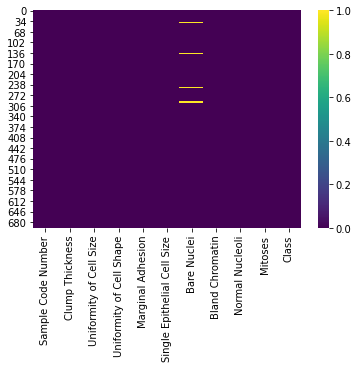

In [ ]:
sns.heatmap(data.isnull(),cmap="viridis")

In [ ]:
def fill_null(cols):
    bare_nuclei = cols[0]
    Class = cols[1]
    if pd.isnull(bare_nuclei):
        if Class==2:
            return class_2_median
        else:
            return class_4_median
    else:
        return bare_nuclei

### Replacing the missing values with median

In [ ]:
class_2_median = data[data["Class"] == 2]["Bare Nuclei"].median()
class_4_median = data[data["Class"] == 4]["Bare Nuclei"].median()    
data["Bare Nuclei"] = data[["Bare Nuclei", "Class"]].apply(fill_null, axis=1)

In [ ]:
data.isnull().sum()

Sample Code Number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

<AxesSubplot:>

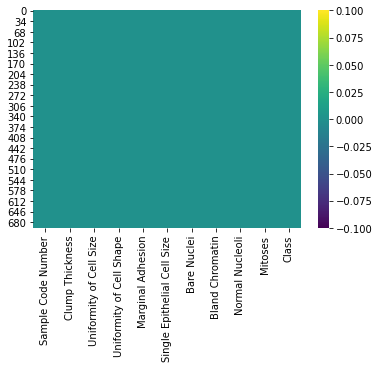

In [ ]:
sns.heatmap(data.isnull(),cmap="viridis")

In [ ]:
data.drop(columns=['Sample Code Number'], inplace=True)

## ii) Split Data into Train and Test

In [ ]:
cols = data.columns
cols

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train = pd.DataFrame(X_train, columns=cols[:-1])
X_test = pd.DataFrame(X_test, columns=cols[:-1])
y_train = pd.DataFrame(y_train, columns=[cols[-1]])
y_test = pd.DataFrame(y_test, columns=[cols[-1]])

## iii) Normalize Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=cols[:-1])
X_test = pd.DataFrame(X_test, columns=cols[:-1])

## iv) Handle Outliers

<AxesSubplot:>

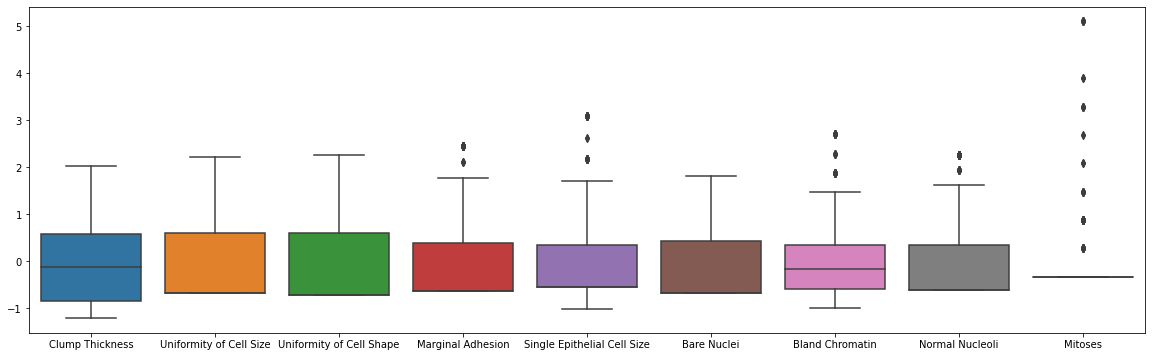

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=X_train)

In [ ]:
X_train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02
mean,-2.033996e-17,-1.355998e-17,-6.779988e-18,-1.084798e-16,-6.101989e-17,-2.711995e-17,4.067993e-17,-4.067993e-17,1.355998e-17
std,1.000956e+00,1.000956e+00,1.000956e+00,1.000956e+00,1.000956e+00,1.000956e+00,1.000956e+00,1.000956e+00,1.000956e+00
min,-1.210009e+00,-6.859656e-01,-7.277187e-01,-6.330752e-01,-1.012316e+00,-6.737891e-01,-9.946594e-01,-6.154667e-01,-3.339073e-01
25%,-8.515893e-01,-6.859656e-01,-7.277187e-01,-6.330752e-01,-5.581604e-01,-6.737891e-01,-5.845874e-01,-6.154667e-01,-3.339073e-01
50%,-1.347495e-01,-6.859656e-01,-7.277187e-01,-6.330752e-01,-5.581604e-01,-6.737891e-01,-1.745154e-01,-6.154667e-01,-3.339073e-01
75%,5.820904e-01,6.023712e-01,5.997820e-01,3.950180e-01,3.501503e-01,4.321326e-01,3.380746e-01,3.443683e-01,-3.339073e-01
max,2.015770e+00,2.212792e+00,2.259158e+00,2.451205e+00,3.075082e+00,1.814535e+00,2.695989e+00,2.264038e+00,5.096117e+00


In [ ]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Clump Thickness                1.433680
Uniformity of Cell Size        1.288337
Uniformity of Cell Shape       1.327501
Marginal Adhesion              1.028093
Single Epithelial Cell Size    0.908311
Bare Nuclei                    1.105922
Bland Chromatin                0.922662
Normal Nucleoli                0.959835
Mitoses                        0.000000
dtype: float64


In [ ]:
for col in X_train:
  col_Q1 = Q1[col]
  col_Q3 = Q3[col]
  col_IQR = IQR[col]
  for index, row in enumerate(X_train[col]):
    if (row < (col_Q1 - 1.5 * col_IQR)) or (row > (col_Q3 + 1.5 * col_IQR)):
      X_train[col][index] = X_train[col].median()

In [ ]:
outliers_index = X_train[((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)].index

In [ ]:
outliers_index

Int64Index([], dtype='int64')

<AxesSubplot:>

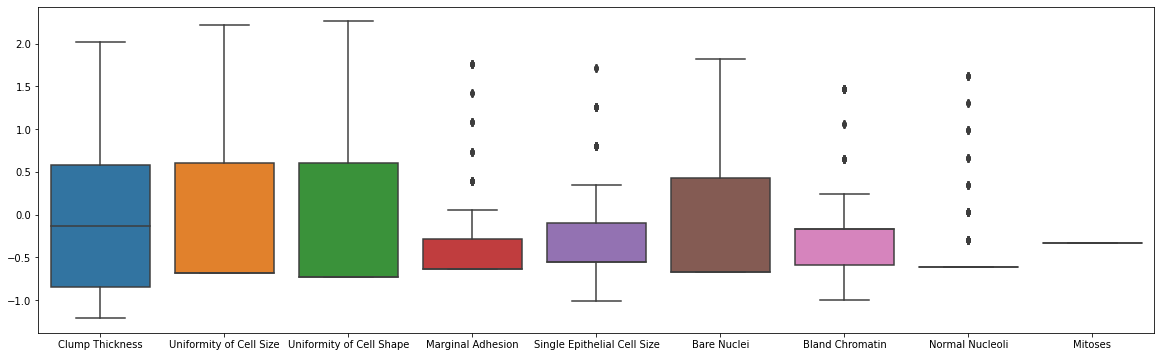

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=X_train)

## v) Handle Skewness

In [ ]:
X_train.skew()

Clump Thickness                0.597184
Uniformity of Cell Size        1.247893
Uniformity of Cell Shape       1.212953
Marginal Adhesion              1.910972
Single Epithelial Cell Size    1.529514
Bare Nuclei                    1.066155
Bland Chromatin                1.074214
Normal Nucleoli                2.225403
Mitoses                        0.000000
dtype: float64

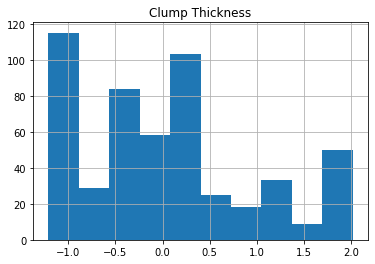

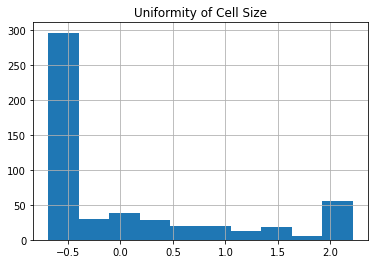

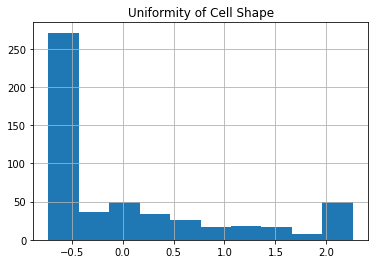

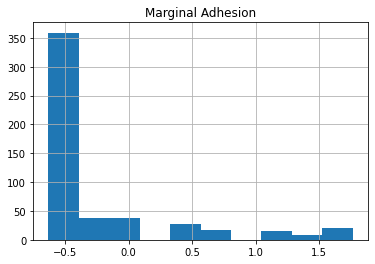

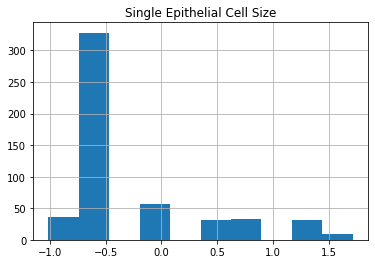

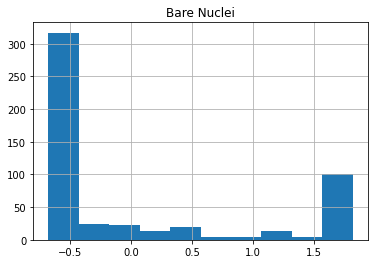

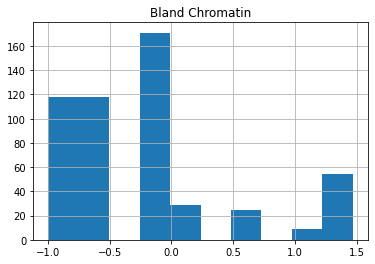

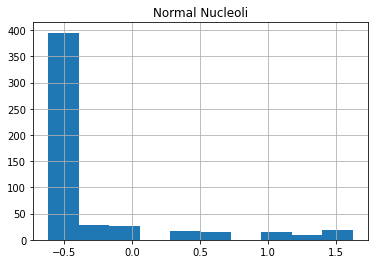

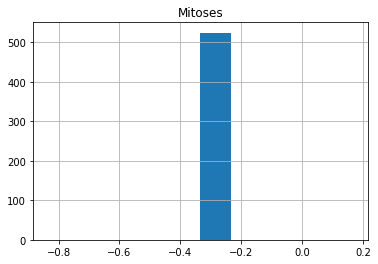

In [ ]:
for col in X_train:
  X_train.hist(column=col)

In [ ]:
best_transformation = {}

Old Skewness: 0.5971835004823766
New Skewness: 0.14460246126710388


C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


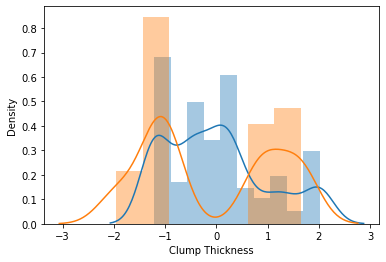

In [ ]:
sns.distplot(X_train['Clump Thickness'], hist=True)
transformed = 1 / np.cbrt(X_train['Clump Thickness'])
print('Old Skewness:', X_train['Clump Thickness'].skew())
print('New Skewness:', transformed.skew())
sns.distplot(transformed, hist=True)
best_transformation['Clump Thickness'] = 'icbrt'

Old Skewness: 1.2478931260115669
New Skewness: 0.3086142554024152


C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


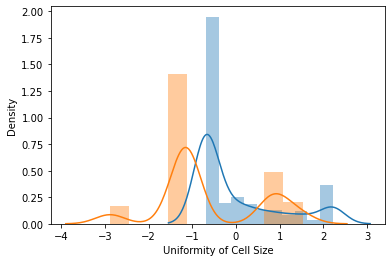

In [ ]:
sns.distplot(X_train['Uniformity of Cell Size'], hist=True)
transformed = 1 / np.cbrt(X_train['Uniformity of Cell Size'])
print('Old Skewness:', X_train['Uniformity of Cell Size'].skew())
print('New Skewness:', transformed.skew())
sns.distplot(transformed, hist=True)
best_transformation['Uniformity of Cell Size'] = 'icbrt'

Old Skewness: 1.212952502089925
New Skewness: 0.41373663967583063


C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


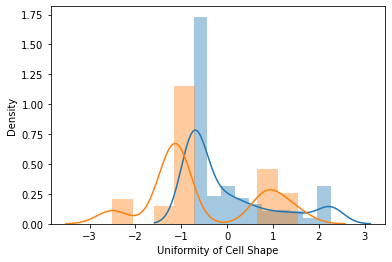

In [ ]:
sns.distplot(X_train['Uniformity of Cell Shape'], hist=True)
transformed = 1 / np.cbrt(X_train['Uniformity of Cell Shape'])
print('Old Skewness:', X_train['Uniformity of Cell Shape'].skew())
print('New Skewness:', transformed.skew())
sns.distplot(transformed, hist=True)
best_transformation['Uniformity of Cell Shape'] = 'icbrt'

C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Old Skewness: 1.9109723486921044
New Skewness: 1.3301800571828248


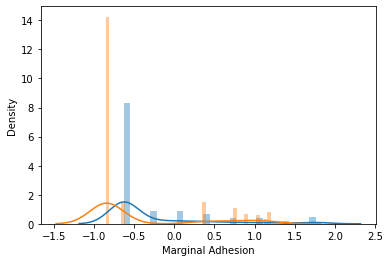

In [ ]:
sns.distplot(X_train['Marginal Adhesion'], hist=True)
transformed = np.cbrt(X_train['Marginal Adhesion'])
print('Old Skewness:', X_train['Marginal Adhesion'].skew())
print('New Skewness:', transformed.skew())
sns.distplot(transformed, hist=True)
best_transformation['Marginal Adhesion'] = 'cbrt'

C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Old Skewness: 1.529514200467998
New Skewness: 1.200854939996295


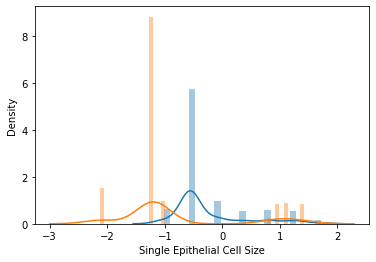

In [ ]:
sns.distplot(X_train['Single Epithelial Cell Size'], hist=True)
transformed = 1 / np.cbrt(X_train['Single Epithelial Cell Size'])
print('Old Skewness:', X_train['Single Epithelial Cell Size'].skew())
print('New Skewness:', transformed.skew())
sns.distplot(transformed, hist=True)
best_transformation['Single Epithelial Cell Size'] = 'icbrt'

C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Old Skewness: 1.0661545550028235
New Skewness: -0.4015029867204847


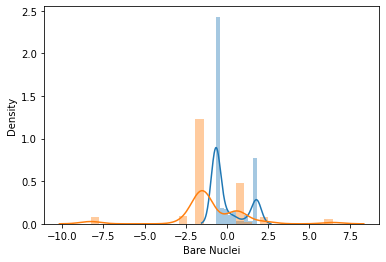

In [ ]:
sns.distplot(X_train['Bare Nuclei'], hist=True)
transformed = np.reciprocal(X_train['Bare Nuclei'])
print('Old Skewness:', X_train['Bare Nuclei'].skew())
print('New Skewness:', transformed.skew())
sns.distplot(transformed, hist=True)
best_transformation['Bare Nuclei'] = 'reciprocal'

Old Skewness: 1.0742140600043257
New Skewness: 0.14392261000890658


C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


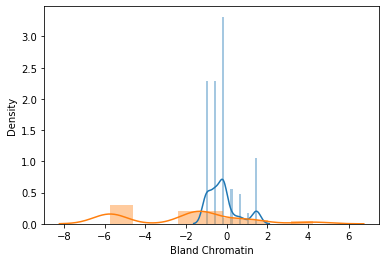

In [ ]:
sns.distplot(X_train['Bland Chromatin'], hist=True)
transformed = np.reciprocal(X_train['Bland Chromatin'])
print('Old Skewness:', X_train['Bland Chromatin'].skew())
print('New Skewness:', transformed.skew())
sns.distplot(transformed, hist=True)
best_transformation['Bland Chromatin'] = 'reciprocal'

C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Old Skewness: 2.225403253530165
New Skewness: 1.735770574317579


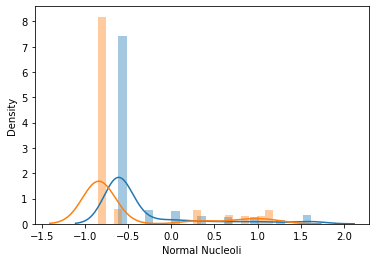

In [ ]:
sns.distplot(X_train['Normal Nucleoli'], hist=True)
transformed = np.cbrt(X_train['Normal Nucleoli'])
print('Old Skewness:', X_train['Normal Nucleoli'].skew())
print('New Skewness:', transformed.skew())
sns.distplot(transformed, hist=True)
best_transformation['Normal Nucleoli'] = 'cbrt'

In [ ]:
best_transformation

{'Clump Thickness': 'icbrt',
 'Uniformity of Cell Size': 'icbrt',
 'Uniformity of Cell Shape': 'icbrt',
 'Marginal Adhesion': 'cbrt',
 'Single Epithelial Cell Size': 'icbrt',
 'Bare Nuclei': 'reciprocal',
 'Bland Chromatin': 'reciprocal',
 'Normal Nucleoli': 'cbrt'}

In [ ]:
for col in X_train:
  if col == 'Mitoses':
    break
  if best_transformation[col] == 'cbrt':
    X_train[col] = np.cbrt(X_train[col])
  elif best_transformation[col] == 'icbrt':
    X_train[col] = 1 / np.cbrt(X_train[col])
  else:
    X_train[col] = np.reciprocal(X_train[col])

In [ ]:
X_train.skew()

Clump Thickness                0.144602
Uniformity of Cell Size        0.308614
Uniformity of Cell Shape       0.413737
Marginal Adhesion              1.330180
Single Epithelial Cell Size    1.200855
Bare Nuclei                   -0.401503
Bland Chromatin                0.143923
Normal Nucleoli                1.735771
Mitoses                        0.000000
dtype: float64

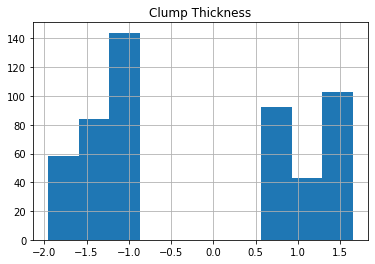

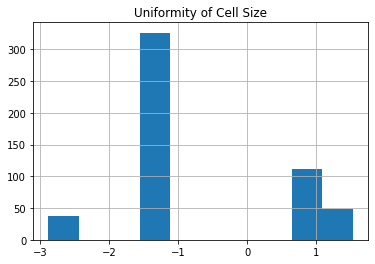

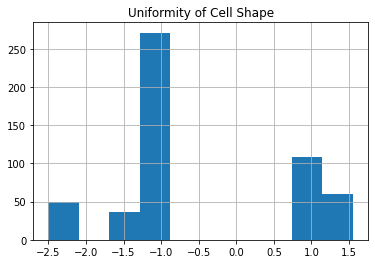

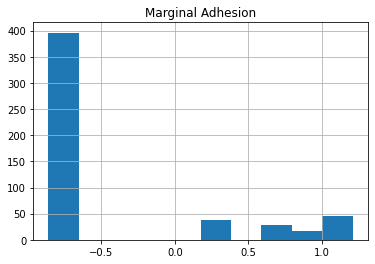

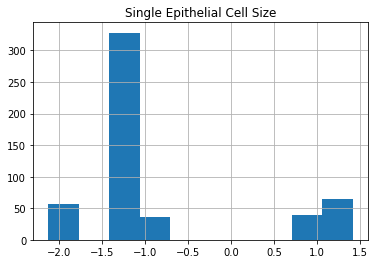

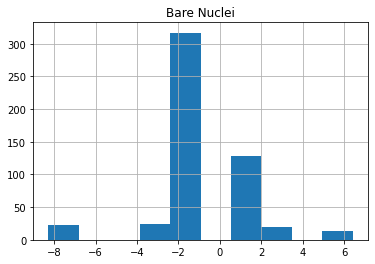

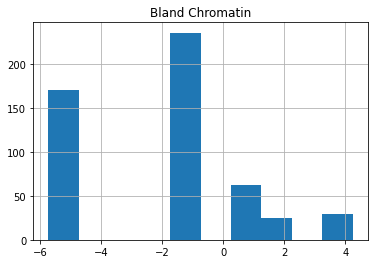

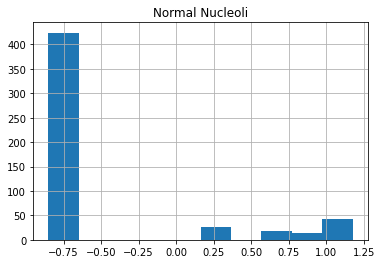

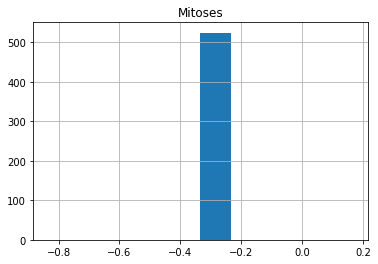

In [ ]:
for col in X_train:
  X_train.hist(column=col)

## vi) Perform Feature Selection

C:\Users\Venkatesh\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


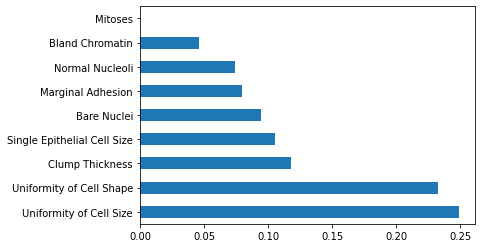

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns[:9])
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [ ]:
X_train_dup = X_train.copy()
X_train_dup['Class'] = y_train
X_train_dup

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.916512,0.767396,1.551215,0.733735,-1.214545,0.551105,-5.730154,-0.666085,-0.333907,4
1,-1.265711,-1.133877,-1.361943,-0.858654,-1.214545,-1.484144,-1.710608,-0.850619,-0.333907,2
2,0.916512,0.767396,0.762110,-0.858654,0.835821,2.314105,4.245264,1.175462,-0.333907,4
3,1.197668,1.026529,0.924992,-0.858654,-2.126418,0.551105,-5.730154,-0.850619,-0.333907,4
4,-1.950552,-1.133877,-1.111763,-0.858654,-1.214545,-8.276208,-1.710608,-0.850619,-0.333907,2
...,...,...,...,...,...,...,...,...,...,...
519,0.791625,-2.881494,1.185775,0.733735,-2.126418,1.015132,-5.730154,0.872551,-0.333907,4
520,1.647393,-1.133877,-1.111763,-0.858654,-1.214545,-1.484144,-1.710608,-0.850619,-0.333907,2
521,-1.950552,-1.133877,-1.111763,-0.858654,-1.214545,-1.484144,-1.005369,-0.850619,-0.333907,2
522,1.647393,-1.133877,-1.111763,-0.858654,-1.214545,-1.484144,-1.710608,-0.850619,-0.333907,2


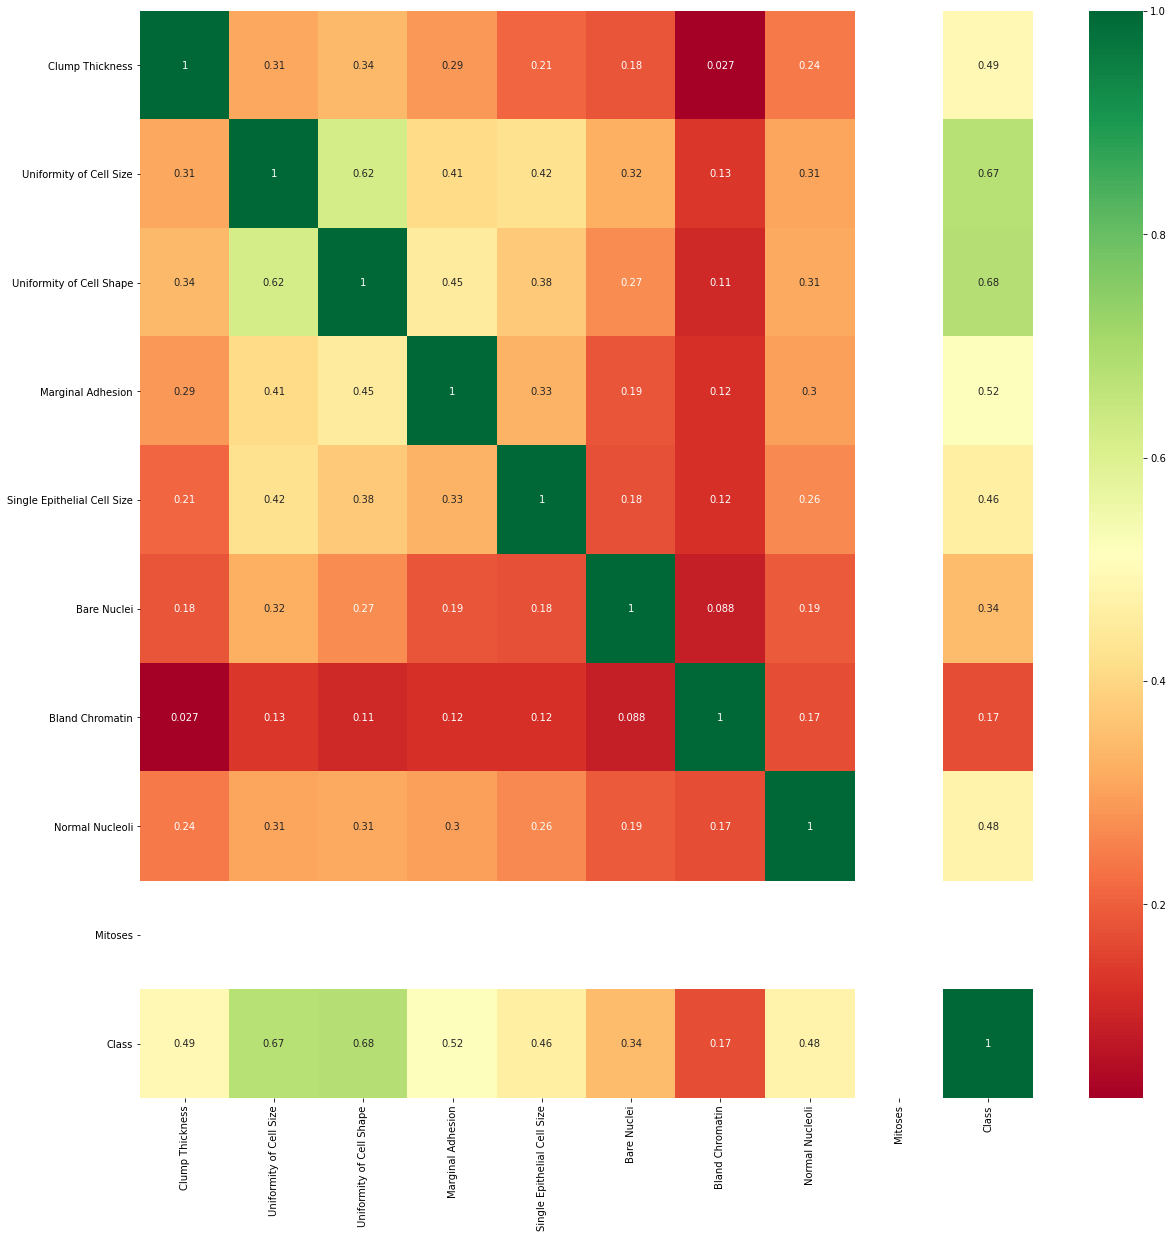

In [ ]:
corrmat = X_train_dup.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(X_train_dup[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [ ]:
X_train.drop(columns=['Mitoses', 'Bland Chromatin'], inplace=True)
X_test.drop(columns=['Mitoses', 'Bland Chromatin'], inplace=True)

## vii) Perform Dimensionality Reduction using Principle Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# 4) Fit the Training Data to Naive Bayes Model and Check its Performance by Predicting on Test Data

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train.to_numpy().ravel())

GaussianNB()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_test, y=y_test.to_numpy().ravel(), cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 95.42 %


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = classifier.predict(X_test)
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, y_pred)
stats = {}
stats['Precision'] = {'Benign': precision[0], 'Malignant': precision[1]}
stats['Recall'] = {'Benign': recall[0], 'Malignant': recall[1]}
stats['F-Score'] = {'Benign': f_score[0], 'Malignant': f_score[1]}
stats = pd.DataFrame(stats)
stats

,Precision,Recall,F-Score
Benign,0.990566,0.937500,0.963303
Malignant,0.898551,0.984127,0.939394


## Perform Hyperparameter Tuning to Improve Performance

In [ ]:
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': [-5.5, -4.5, -3.5, -2.5, -1.5, 1.5, 2.5, 3.5, 4.5, 5.5]}
classifier = GaussianNB()
grid_search = GridSearchCV(estimator=classifier,
                          param_grid=params_NB,
                          cv=10,
                          scoring='accuracy',
                          n_jobs=-1)
grid_search.fit(X_train, y_train.to_numpy().ravel())
best_parameters = grid_search.best_params_
print('Best Parameters:', best_parameters)

Best Parameters: {'var_smoothing': 1.5}


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB(var_smoothing=1.5)
classifier.fit(X_train, y_train.to_numpy().ravel())

GaussianNB(var_smoothing=1.5)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_test, y=y_test.to_numpy().ravel(), cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 96.54 %


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = classifier.predict(X_test)
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, y_pred)
stats = {}
stats['Precision'] = {'Benign': precision[0], 'Malignant': precision[1]}
stats['Recall'] = {'Benign': recall[0], 'Malignant': recall[1]}
stats['F-Score'] = {'Benign': f_score[0], 'Malignant': f_score[1]}
stats = pd.DataFrame(stats)
stats

,Precision,Recall,F-Score
Benign,0.981818,0.964286,0.972973
Malignant,0.938462,0.968254,0.953125


# 5) Visualising the Training and Test Set Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


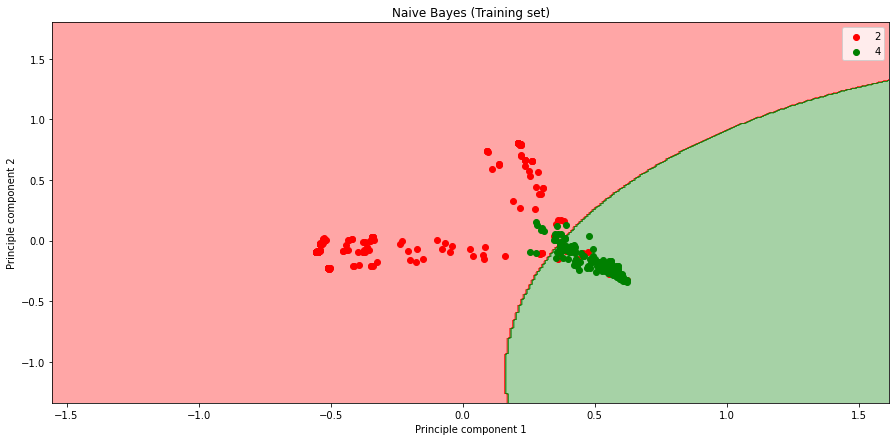

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(15, 7))
X_set, y_set = X_train, y_train.to_numpy().ravel()
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.35, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


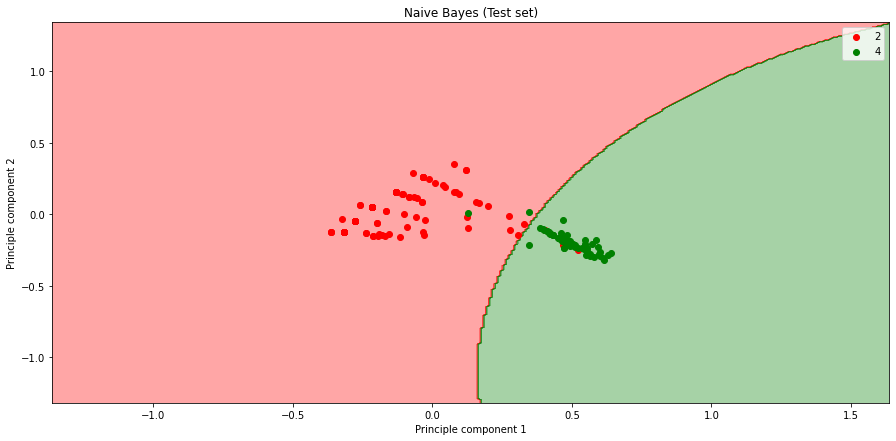

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(15, 7))
X_set, y_set = X_test, y_test.to_numpy().ravel()
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.35, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.legend()
plt.show()

# 6) Predicting New Data

In [ ]:
newPrediction = classifier.predict(kpca.transform([[0.916512, 0.767396, 1.551215, 0.733735, 1.214545, 0.551105, -0.666085]]))
if newPrediction == 2:
  print("The cancer is Benign")
else:
  print(" The cancer is Malignant")

 The cancer is Malignant
